In [2]:
%matplotlib inline
import nengo.spa as spa
import numpy as np
import pylab



In [3]:
D = 256
X = spa.SemanticPointer(D)
X.make_unitary()
Y = spa.SemanticPointer(D)
Y.make_unitary()

CAR = spa.SemanticPointer(D)

def power(s, e):
    x = np.fft.ifft(np.fft.fft(s.v) ** e).real
    return spa.SemanticPointer(data=x)

v = CAR*power(X,1.3)*power(Y,0.4) + CAR*power(X,-0.5)*power(Y,0.1)

In [89]:
limit = 300
D = 1024
X = spa.SemanticPointer(D)
X.make_unitary()
Y = spa.SemanticPointer(D)
Y.make_unitary()

Q = spa.SemanticPointer(D)
Q.make_unitary()

t1_x, t1_y = 0.5*limit, 0.5*limit
t2_x, t2_y = -0.3*limit, 0.9*limit
t3_x, t3_y = 0*limit, -0.9*limit
t = power(X, t1_x)*power(Y, t1_y) + power(X, t2_x)*power(Y, t2_y) + power(X, t3_x)*power(Y, t3_y)

M = 500
xs = np.linspace(-limit, limit, M)
ys = np.linspace(-limit, limit, M)

vs = np.zeros((M,M))
for i,x in enumerate(xs):
    for j, y in enumerate(ys):
        v = power(X, x)*power(Y,y)
        vs[i,j] = np.dot(v.v, t.v)
        


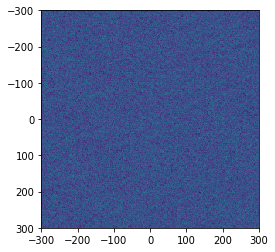

In [90]:
pylab.imshow(vs, interpolation='none', extent=(-limit,limit,limit,-limit))
pylab.show()

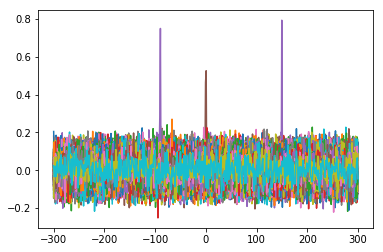

In [91]:
pylab.plot(xs, vs)
pylab.show()

In [11]:
d.shape

(50, 50, 256)

In [12]:
vs.shape

(50, 50, 256)